In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

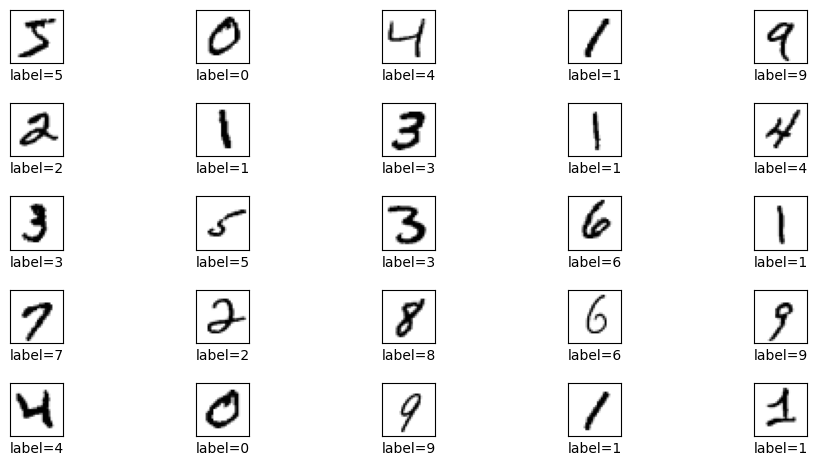

In [12]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xlabel(f"label={y_train[i]}")
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [16]:
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
model.reset_states()
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5


2023-05-09 15:40:03.512837: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.9171 - val_loss: 0.1516 - val_accuracy: 0.9568
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1313 - accuracy: 0.9609 - val_loss: 0.1296 - val_accuracy: 0.9611
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.1008 - val_accuracy: 0.9698
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0676 - accuracy: 0.9791 - val_loss: 0.0932 - val_accuracy: 0.9703
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0926 - val_accuracy: 0.9732


In [20]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9746


[0.08528073877096176, 0.9746000170707703]

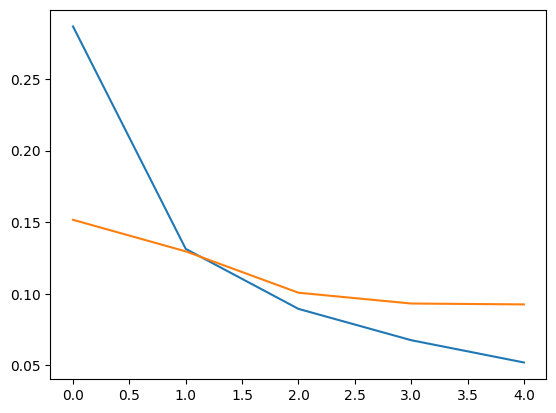

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])